This notebook will do a clustering of houses and see if it matches the label 'Neighborhood'

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm, trange
from sklearn import linear_model

In [3]:
X_orig = pd.read_csv('Data/Processed/AmesHousingALL_cln_v0.csv', index_col = 'Order')

In [4]:
X_orig.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
1,20,4,141.0,31770,1,1,0,3,4,0,...,0,-1,4,0,0,5,2010,0,3,215000
2,20,7,80.0,11622,1,1,3,3,4,4,...,0,-1,2,0,0,6,2010,0,3,105000
3,20,4,81.0,14267,1,1,0,3,4,0,...,0,-1,4,1,12500,6,2010,0,3,172000
4,20,4,93.0,11160,1,1,3,3,4,0,...,0,-1,4,0,0,4,2010,0,3,244000
5,60,4,74.0,13830,1,1,0,3,4,4,...,0,-1,2,0,0,3,2010,0,3,189900


In [4]:
X_orig.shape

(2930, 80)

In [5]:
X_orig['Neighborhood'].value_counts()

15    443
5     267
20    239
7     194
24    182
19    166
8     165
22    151
17    131
23    125
14    114
3     108
6     103
11     93
26     72
18     71
25     51
21     48
4      44
13     37
2      30
0      28
27     24
16     23
1      10
9       8
10      2
12      1
Name: Neighborhood, dtype: int64

In [5]:
#try use all features to cluster
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [6]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
model = KMeans(n_clusters = 27)
pipeline = make_pipeline(scaler,model)

In [8]:
pipeline.fit(X_orig) ## pure kmeans

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=27, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [9]:
labels = pipeline.predict(X_orig)

In [10]:
labl_df = pd.DataFrame({'labels':labels, 'Neighborhoods':X_orig['Neighborhood']})

In [11]:
ct = pd.crosstab(index=labl_df['labels'], columns=labl_df['Neighborhoods'])

In [12]:
print(ct.shape)

(27, 28)


In [13]:
ct

Neighborhoods,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
labels,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,2,5,2,7,17,2,0,...,0,0,1,2,25,3,0,0,4,1
1,0,0,0,19,1,39,5,42,2,0,...,0,0,34,5,66,7,0,0,0,1
2,0,0,0,0,0,3,1,1,3,0,...,41,40,2,0,0,4,10,12,4,1
3,0,0,0,1,8,45,9,1,43,0,...,14,2,0,0,2,32,15,0,5,3
4,0,0,0,0,0,8,0,3,1,0,...,5,52,0,0,0,1,9,10,14,2
5,0,0,0,0,0,38,0,2,71,0,...,3,0,1,0,0,11,16,0,5,0
6,1,0,0,0,0,37,1,2,5,0,...,0,11,0,0,0,9,21,1,7,1
7,0,0,0,11,1,0,4,17,0,0,...,0,0,40,8,3,3,0,0,0,0
8,0,0,0,5,1,0,1,17,1,0,...,0,0,5,0,6,9,0,0,0,0


In [14]:
ct.idxmax(axis=0)

Neighborhoods
0     12
1     18
2     18
3     10
4     26
5      3
6     10
7      1
8      5
9     12
10     8
11    10
12    18
13    18
14     1
15     1
16    18
17     0
18     2
19     4
20    10
21    10
22     1
23     3
24    21
25    12
26     4
27    20
dtype: int64

In [15]:
ct.idxmax(axis=0).value_counts()

18    5
10    5
1     4
12    3
4     2
3     2
26    1
21    1
20    1
8     1
5     1
2     1
0     1
dtype: int64

In [16]:
print(model.inertia_) ### evaluation kmean 

138038.699618


In [7]:
# probe if the change of # of clusters would help
ks = range(3, 27)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    pipeline = make_pipeline(scaler,model)
    # Fit model 
    pipeline.fit(X_orig)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    

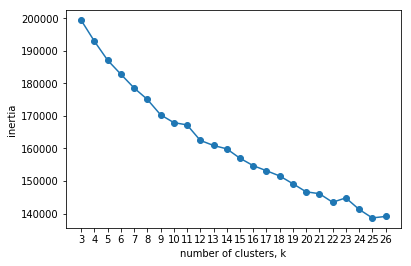

In [19]:
import matplotlib.pyplot as plt
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [20]:
pca = PCA()
pipeline2 = make_pipeline(scaler,pca,model)
pipeline2.fit(X_orig) ## pure kmeans

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=26, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [21]:
features = range(pca.n_components_)
print(pca.n_components_)

80


<BarContainer object of 80 artists>

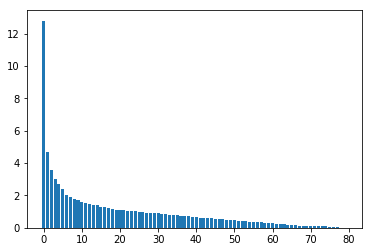

In [22]:

plt.bar(features, pca.explained_variance_)

In [12]:
### redo pca with 6 components
pca = PCA(n_components=6)
pipeline2 = make_pipeline(scaler,pca,model)
pipeline2.fit(X_orig) ## pure kmeans


Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=27, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [13]:
labels = pipeline2.predict(X_orig)

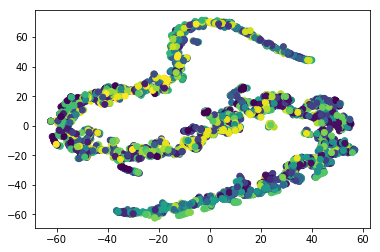

In [14]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
tmodel3 = TSNE(learning_rate=100)
trans = tmodel3.fit_transform(X_orig)
xs = trans[:,0]
ys = trans[:,1]
plt.scatter(xs, ys, c=labels) 

In [132]:
labels = pipeline2.predict(X_orig)
labl_df = pd.DataFrame({'labels':labels, 'Neighborhoods':X_orig['Neighborhood']})
ct = pd.crosstab(index=labl_df['labels'], columns=labl_df['Neighborhoods'])
ct

Neighborhoods,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
labels,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,4,2,10,3,22,0,...,3,0,0,0,8,13,1,0,3,3
1,0,0,0,4,1,33,3,12,0,0,...,0,0,8,2,22,1,0,0,1,0
2,0,0,0,0,0,4,0,1,1,0,...,5,52,0,0,0,0,8,10,15,0
3,0,0,0,0,1,0,0,4,0,0,...,0,0,16,9,2,0,0,0,0,0
4,0,0,0,12,1,0,1,16,0,0,...,0,0,28,6,3,3,0,0,0,0
5,0,0,0,0,2,36,2,1,2,0,...,2,7,0,0,0,11,15,2,8,3
6,0,0,0,0,6,0,4,9,6,0,...,0,0,0,2,8,0,0,0,3,1
7,0,0,0,1,2,0,8,4,0,0,...,0,0,23,6,2,1,0,0,0,0
8,0,0,0,22,0,1,4,17,1,0,...,0,0,45,3,3,0,0,0,0,0


In [107]:
ct.idxmax(axis=0)

Neighborhoods
0     14
1     16
2     16
3      0
4     24
5      8
6      0
7      0
8      8
9     10
10    16
11    25
12    26
13    16
14     3
15    18
16    16
17    12
18     5
19     1
20     0
21     0
22     3
23     2
24    15
25    23
26     1
27    23
dtype: int64

In [108]:
ct.idxmax(axis=0).value_counts()

16    5
0     5
23    2
8     2
3     2
1     2
26    1
25    1
24    1
18    1
15    1
14    1
12    1
10    1
5     1
2     1
dtype: int64

In [122]:
print(model.inertia_) ### evaluation kmean 

17038.7051253


In [26]:
# probe if the change of # of clusters would help
ks = range(3, 27)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    pipeline = make_pipeline(scaler,model)
    # Fit model 
    pipeline.fit(X_orig)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    

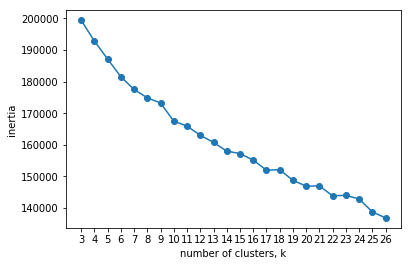

In [27]:
import matplotlib.pyplot as plt
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [15]:
X = PCA(6).fit_transform(X_orig)

#clusters = pca.
#fig, ax = plt.subplots(1, 2, figsize=(8, 4))
#ax[0].scatter(X[:, 0], X[:, 1], c=clusters)
#ax[1].scatter(X[:, 0], X[:, 1], c=X)

In [16]:
print(X.shape)
print(X_orig.shape)

(2930, 6)
(2930, 80)


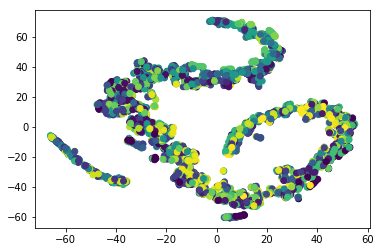

In [17]:
tmodel4 = TSNE(learning_rate=100)
trans = tmodel4.fit_transform(X)
xs = trans[:,0]
ys = trans[:,1]
plt.scatter(xs, ys, c=labels) 

In [20]:
print(trans.shape)

(2930, 2)


In [18]:
## do kmean
model = KMeans(n_clusters=27)
model.fit(X)
labels = model.predict(X)

In [9]:
tmodel5 = TSNE(learning_rate=100)
trans = tmodel5.fit_transform(X)
xs = trans[:,0]
ys = trans[:,1]
 

NameError: name 'X' is not defined

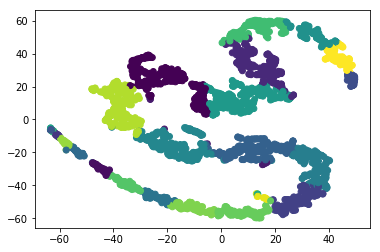

In [34]:
plt.scatter(xs, ys, c=labels)

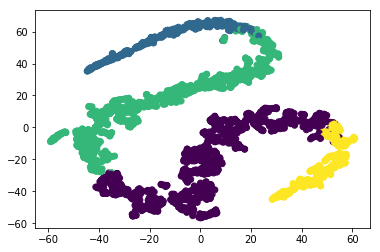

In [38]:
from sklearn.cluster import SpectralClustering
model2 = SpectralClustering(n_clusters=4, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model2.fit_predict(X)
tmodel6 = TSNE(learning_rate=100)
trans = tmodel6.fit_transform(X)
plt.scatter(trans[:, 0], trans[:, 1], c=labels)

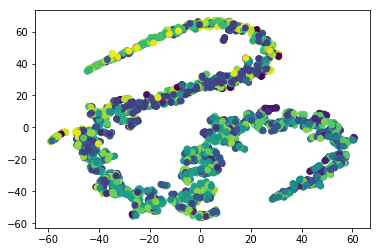

In [39]:
plt.scatter(trans[:,0], trans[:,1], c=X_orig['Neighborhood'].values)

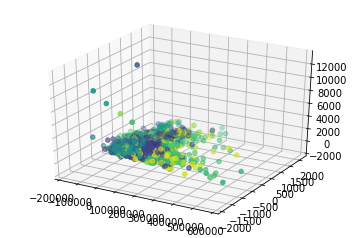

In [26]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 4], X[:, 3], c=X_orig['Neighborhood'].values)
ax.view_init(30, -60)